In [40]:
!pwd

/content


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)

## Se obtienen los valores de las ventas de autos de Noruega

- Year - year of sales 
- Month - month of sales
- Quantity - total number of units sold
- Quantity_YoY - change YoY in units
- Import - total number of units imported (used cars)
- Import_YoY - change YoY in units
- Used - total number of units owner changes inside the country (data available from 2012)
- Used_YoY - change YoY in units
- Avg_CO2 - average CO2 emission of all cars sold in a given month (in g/km)
- Bensin_CO2 - average CO2 emission of bensin-fueled cars sold in a given month (in g/km)
- Diesel_CO2 - average CO2 emission of diesel-fueled cars sold in a given month (in g/km)
- Quantity_Diesel - number of diesel-fueled cars sold in the country in a given month
- DieselShare - share of diesel cars in total sales (QuantityDiesel / Quantity)
- DieselShareLY - share of diesel cars in total sales a year ago
- Quantity_Hybrid - number of new hybrid cars sold in the country (both PHEV and BV)
- Quantity_Electric - number of new electric cars sold in the country (zero emission vehicles)
- Import_Electric - number of used electric cars imported to the country (zero emission vehicles)

In [42]:
df_car_sales_norway = pd.read_csv('norway_new_car_sales_by_month.csv')
df_car_sales_norway.columns
df_car_sales_norway.head(3)
ym = df_car_sales_norway.apply(lambda x: str(int(x['Year']))+str(int(x['Month'])) ,axis=1)
df_car_sales_norway['yyyymm'] = ym
df_car_sales_norway.head(3)

,Year,Month,Quantity,Quantity_YoY,Import,Import_YoY,Used,Used_YoY,Avg_CO2,Bensin_Co2,Diesel_Co2,Quantity_Diesel,Diesel_Share,Diesel_Share_LY,Quantity_Hybrid,Quantity_Electric,Import_Electric,yyyymm
0,2007,1,12685,5227,2276,257,NaN,NaN,152,155,152,10072,79.4,52.5,NaN,NaN,NaN,20071
1,2007,2,9793,2448,1992,-89,NaN,NaN,156,159,155,7222,73.7,47.4,NaN,NaN,NaN,20072
2,2007,3,11264,1445,2626,45,NaN,NaN,159,161,158,7965,70.7,48.1,NaN,NaN,NaN,20073


In [43]:
df_car_sales_norway[['Year','Month']].groupby(['Year']).count()

,Month
Year,
2007,12
2008,12
2009,12
2010,12
2011,12
...,...
2013,12
2014,12
2015,12


In [44]:
# Se puede ver que el año 2017 solo tiene un mes, se va a filtrar solo hasta el 2016
df_car_sales_norway = df_car_sales_norway.loc[df_car_sales_norway['Year']<2017,:]

In [45]:
sales = df_car_sales_norway[['yyyymm','Quantity_Electric','Quantity_Hybrid','Quantity_Diesel']].groupby(['yyyymm']).sum()
sales.head(3)

,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
yyyymm,,,
20071,0.0,0.0,10072
200710,0.0,0.0,8967
200711,0.0,0.0,7683


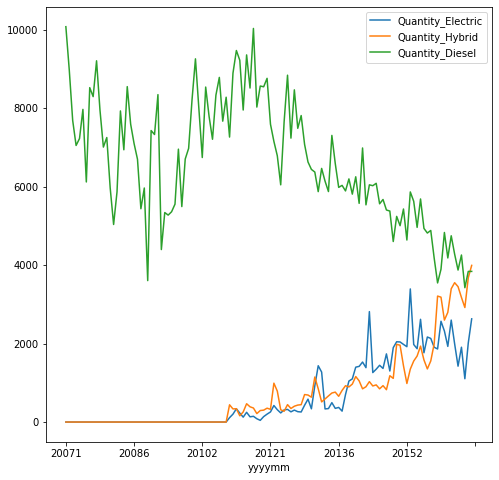

In [46]:
sales.plot(figsize=(8, 8))

## Se obtienen los valores de polución de Oslo

In [47]:
# Fuente: https://luftkvalitet.nilu.no/historikk

# Medidas en µg/m³
norway_pollution = pd.read_csv('norway_pollution.csv',sep=';', decimal=",")
cols = ['Date','NO','Coverage_NO','NO2','Coverage_NO2','NOx','Coverage_NOx','PM1','Coverage_PM1','PM10','Coverage_PM10','PM2.5','Coverage_PM2.5']
norway_pollution.columns = cols

norway_pollution['Date'] = norway_pollution['Date'].apply(lambda x: str(x).replace('.','-'))
norway_pollution['Date'] = pd.to_datetime(norway_pollution['Date'],format='%d-%m-%Y %H:%M') 

norway_pollution['Year'] = pd.DatetimeIndex(norway_pollution['Date']).year
norway_pollution['Month'] = pd.DatetimeIndex(norway_pollution['Date']).month

norway_pollution['NO'].astype(float)
norway_pollution['NO2'].astype(float)
norway_pollution['NOx'].astype(float)
norway_pollution['PM1'].astype(float)
norway_pollution['PM10'].astype(float)
norway_pollution['PM2.5'].astype(float)

ym = norway_pollution.apply(lambda x: str(int(x['Year']))+str(int(x['Month'])) ,axis=1)
norway_pollution['yyyymm'] = ym

norway_pollution.head(3)

,Date,NO,Coverage_NO,NO2,Coverage_NO2,NOx,Coverage_NOx,PM1,Coverage_PM1,PM10,Coverage_PM10,PM2.5,Coverage_PM2.5,Year,Month,yyyymm
0,2007-01-01,158.513704,99,69.664315,99.0,311.881954,99,NaN,NaN,36.213315,99.0,21.339237,99.0,2007,1,20071
1,2007-02-01,92.943563,99,53.958982,99.0,195.968862,99,NaN,NaN,25.469173,99.0,16.278195,99.0,2007,2,20072
2,2007-03-01,64.818805,76,52.085589,76.0,151.148682,76,NaN,NaN,49.421622,99.0,NaN,32.0,2007,3,20073


In [48]:
norway_pollution[['Year','Month']].groupby(['Year']).count()

,Month
Year,
2007,12
2008,12
2009,12
2010,12
2011,12
...,...
2014,12
2015,12
2016,12


In [49]:
# Al igual que el anterior, se va a filtrar solo hasta el 2016
norway_pollution = norway_pollution.loc[norway_pollution['Year']<2017,:]

In [50]:
df_pollutant = norway_pollution[['yyyymm','NO','NO2','NOx','PM1','PM10','PM2.5']]
df_pollutant = df_pollutant.groupby(['yyyymm']).mean() 
df_pollutant = df_pollutant.fillna(0)
df_pollutant.head(3)

,NO,NO2,NOx,PM1,PM10,PM2.5
yyyymm,,,,,,
20071,158.513704,69.664315,311.881954,0.0,36.213315,21.339237
200710,83.067935,47.385734,174.311821,0.0,27.250720,12.427754
200711,131.184344,59.166291,259.618054,0.0,34.085554,14.652720


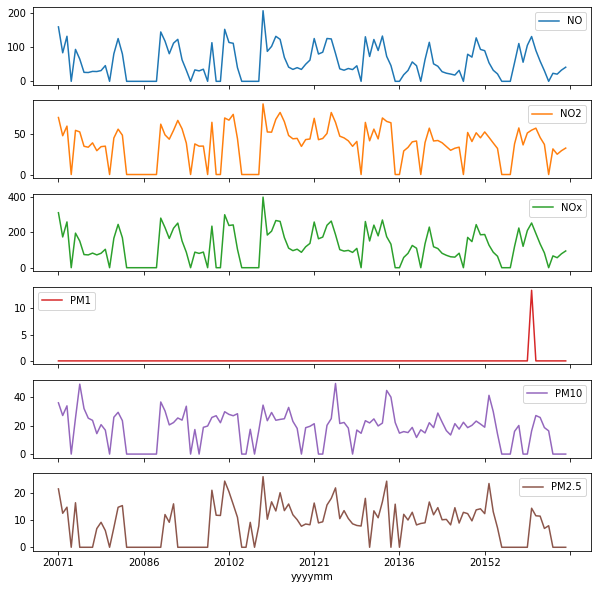

In [51]:
df_pollutant.plot(subplots=True, figsize=(10, 10));

## Se juntan los datasets

In [52]:
df_all = norway_pollution.merge(df_car_sales_norway, how='inner', left_on=['Year'],right_on=['Year'])


df_all = df_all[['Year','NO','NO2','NOx','PM10','PM2.5','Quantity_Electric','Quantity_Hybrid','Quantity_Diesel']]
df_all = df_all.fillna(0)
df_all.head(5)

,Year,NO,NO2,NOx,PM10,PM2.5,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
0,2007,158.513704,69.664315,311.881954,36.213315,21.339237,0.0,0.0,10072
1,2007,158.513704,69.664315,311.881954,36.213315,21.339237,0.0,0.0,7222
2,2007,158.513704,69.664315,311.881954,36.213315,21.339237,0.0,0.0,7965
3,2007,158.513704,69.664315,311.881954,36.213315,21.339237,0.0,0.0,6116
4,2007,158.513704,69.664315,311.881954,36.213315,21.339237,0.0,0.0,8519


In [53]:
# Filtrar los datos donde las ventas electricas son mayores a 0
df_all=df_all.loc[df_all['Quantity_Electric']>0,:]
df_all
df_all.head(10)

,Year,NO,NO2,NOx,PM10,PM2.5,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
576,2011,205.520704,86.287551,400.324222,34.606061,25.807803,112.0,439.0,7260
577,2011,205.520704,86.287551,400.324222,34.606061,25.807803,124.0,257.0,7949
578,2011,205.520704,86.287551,400.324222,34.606061,25.807803,248.0,466.0,9353
579,2011,205.520704,86.287551,400.324222,34.606061,25.807803,133.0,388.0,8509
580,2011,205.520704,86.287551,400.324222,34.606061,25.807803,146.0,357.0,10027
581,2011,205.520704,86.287551,400.324222,34.606061,25.807803,84.0,215.0,8024
582,2011,205.520704,86.287551,400.324222,34.606061,25.807803,43.0,293.0,8560
583,2011,205.520704,86.287551,400.324222,34.606061,25.807803,138.0,303.0,8541
584,2011,205.520704,86.287551,400.324222,34.606061,25.807803,201.0,353.0,8756
585,2011,205.520704,86.287551,400.324222,34.606061,25.807803,201.0,334.0,8888


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5a8b558d0>,
      dtype=object)

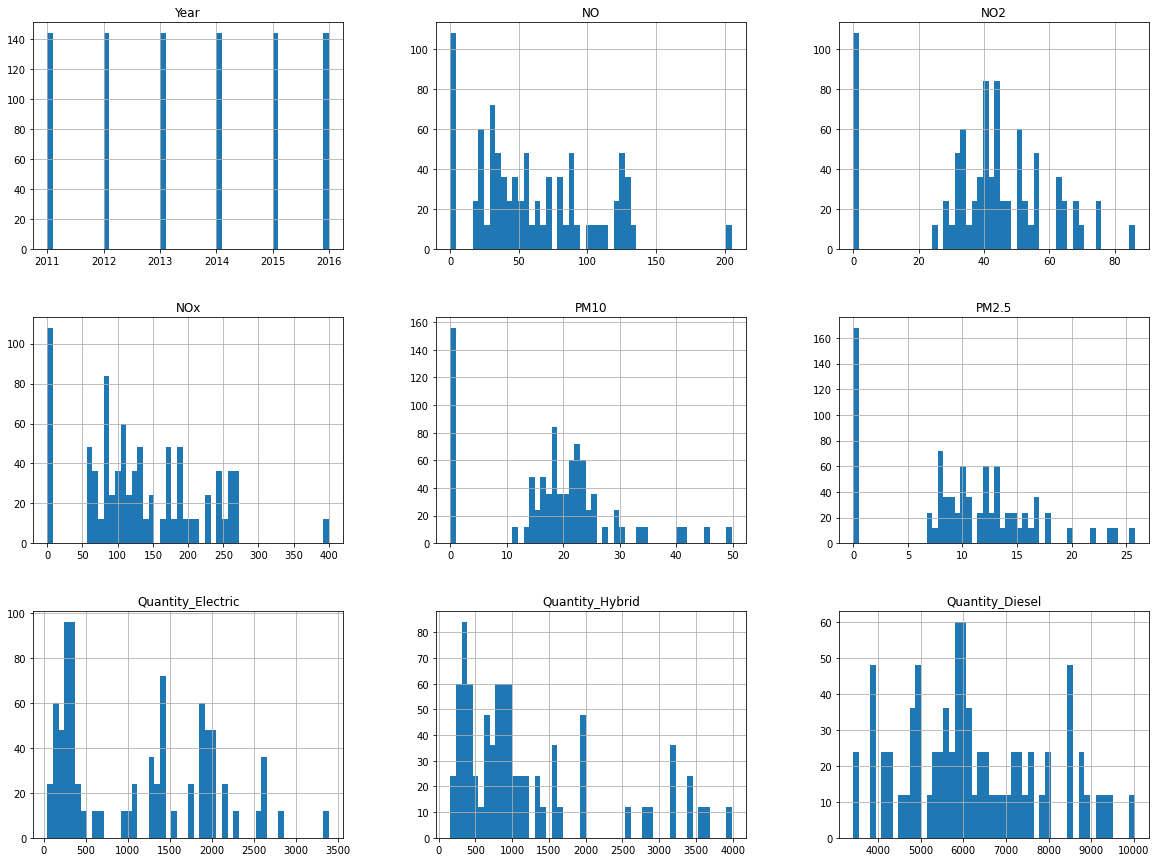

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
df_all.hist(bins=50, figsize=(20,15))


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

val_to_scaler = df_all[['NO','NO2','NOx','PM10','PM2.5','Quantity_Electric','Quantity_Hybrid','Quantity_Diesel']]
scaler.fit(val_to_scaler)
vals = scaler.transform(val_to_scaler)

df_scaled = pd.DataFrame(vals)
df_scaled.columns = ['NO','NO2','NOx','PM10','PM2.5','Quantity_Electric','Quantity_Hybrid','Quantity_Diesel']
df_scaled.insert(0,'Year',df_all['Year'])
df_scaled


,Year,NO,NO2,NOx,PM10,PM2.5,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
0,NaN,3.354827,2.305127,3.201592,1.472763,2.464195,-1.186070,-0.779534,0.640460
1,NaN,3.354827,2.305127,3.201592,1.472763,2.464195,-1.172201,-0.963245,1.072755
2,NaN,3.354827,2.305127,3.201592,1.472763,2.464195,-1.028892,-0.752281,1.953658
3,NaN,3.354827,2.305127,3.201592,1.472763,2.464195,-1.161800,-0.831014,1.424113
4,NaN,3.354827,2.305127,3.201592,1.472763,2.464195,-1.146775,-0.862305,2.376542
...,...,...,...,...,...,...,...,...,...
859,2012.0,1.625297,0.677505,1.447680,-0.187178,0.644020,1.012102,2.487882,-1.507211
860,2012.0,1.625297,0.677505,1.447680,-0.187178,0.644020,1.722868,2.805842,-1.506584
861,2012.0,1.625297,0.677505,1.447680,-0.187178,0.644020,0.835278,2.016494,-1.691046
862,2012.0,1.625297,0.677505,1.447680,-0.187178,0.644020,1.651213,1.988231,-1.472703


In [56]:
df_pollutant_sales = df_scaled.groupby(['Year']).mean() 
df_pollutant_sales.head(3)


,NO,NO2,NOx,PM10,PM2.5,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
Year,,,,,,,,
2011.0,-0.189095,-0.413884,-0.247284,-0.125913,-0.221444,1.168124,0.331222,-0.690672
2012.0,-0.039449,-0.154268,-0.067574,-0.728916,-0.924753,1.019518,1.967538,-1.359558


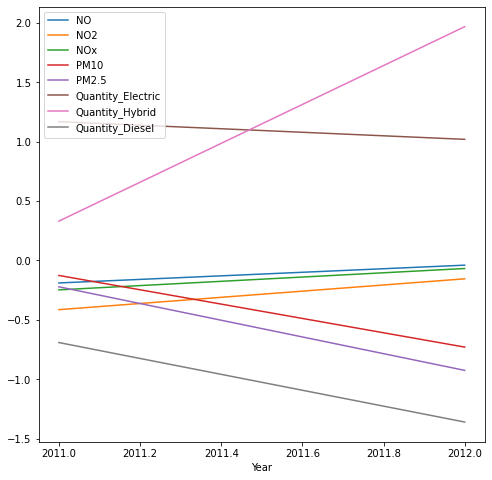

In [57]:
df_pollutant_sales.plot(figsize=(8, 8))

In [58]:
matriz = df_pollutant_sales.corr()
matriz[["Quantity_Electric", "Quantity_Hybrid"	, "Quantity_Diesel"]]

,Quantity_Electric,Quantity_Hybrid,Quantity_Diesel
NO,-1.0,1.0,-1.0
NO2,-1.0,1.0,-1.0
NOx,-1.0,1.0,-1.0
PM10,1.0,-1.0,1.0
PM2.5,1.0,-1.0,1.0
Quantity_Electric,1.0,-1.0,1.0
Quantity_Hybrid,-1.0,1.0,-1.0
Quantity_Diesel,1.0,-1.0,1.0


In [59]:
Año = df_all.iloc[:,0]
Año 

576     2011
577     2011
578     2011
579     2011
580     2011
        ... 
1435    2016
1436    2016
1437    2016
1438    2016
1439    2016
Name: Year, Length: 864, dtype: int64

In [60]:
NO = df_all.iloc[:,1]
NO


576     205.520704
577     205.520704
578     205.520704
579     205.520704
580     205.520704
           ...    
1435    130.451496
1436    130.451496
1437    130.451496
1438    130.451496
1439    130.451496
Name: NO, Length: 864, dtype: float64

In [61]:
Quantity_Electric = df_all.iloc[:,6]
Quantity_Electric

576      112.0
577      124.0
578      248.0
579      133.0
580      146.0
         ...  
1435    2014.0
1436    2629.0
1437    1861.0
1438    2567.0
1439    2319.0
Name: Quantity_Electric, Length: 864, dtype: float64

In [62]:
import numpy as np
x_venta_autos = np.array([Quantity_Electric]).reshape((-1, 1))
y_pollution = np.array([NO]).reshape((-1,1))


In [63]:
x_año = np.array([Año]).reshape((-1,1))

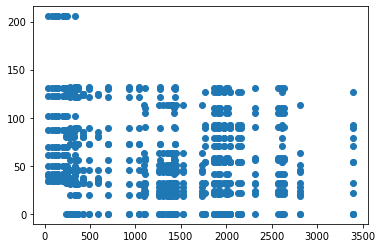

In [64]:
import matplotlib.pyplot as plt
plt.scatter(x_venta_autos,y_pollution)

In [65]:
print(x_venta_autos)
print(y_pollution)
print(x_año)

[[ 112.]
 [ 124.]
 [ 248.]
 [ 133.]
 [ 146.]
 [  84.]
 [  43.]
 [ 138.]
 [ 201.]
 [ 201.]
 [ 338.]
 [ 228.]
 [ 112.]
 [ 124.]
 [ 248.]
 [ 133.]
 [ 146.]
 [  84.]
 [  43.]
 [ 138.]
 [ 201.]
 [ 201.]
 [ 338.]
 [ 228.]
 [ 112.]
 [ 124.]
 [ 248.]
 [ 133.]
 [ 146.]
 [  84.]
 [  43.]
 [ 138.]
 [ 201.]
 [ 201.]
 [ 338.]
 [ 228.]
 [ 112.]
 [ 124.]
 [ 248.]
 [ 133.]
 [ 146.]
 [  84.]
 [  43.]
 [ 138.]
 [ 201.]
 [ 201.]
 [ 338.]
 [ 228.]
 [ 112.]
 [ 124.]
 [ 248.]
 [ 133.]
 [ 146.]
 [  84.]
 [  43.]
 [ 138.]
 [ 201.]
 [ 201.]
 [ 338.]
 [ 228.]
 [ 112.]
 [ 124.]
 [ 248.]
 [ 133.]
 [ 146.]
 [  84.]
 [  43.]
 [ 138.]
 [ 201.]
 [ 201.]
 [ 338.]
 [ 228.]
 [ 112.]
 [ 124.]
 [ 248.]
 [ 133.]
 [ 146.]
 [  84.]
 [  43.]
 [ 138.]
 [ 201.]
 [ 201.]
 [ 338.]
 [ 228.]
 [ 112.]
 [ 124.]
 [ 248.]
 [ 133.]
 [ 146.]
 [  84.]
 [  43.]
 [ 138.]
 [ 201.]
 [ 201.]
 [ 338.]
 [ 228.]
 [ 112.]
 [ 124.]
 [ 248.]
 [ 133.]
 [ 146.]
 [  84.]
 [  43.]
 [ 138.]
 [ 201.]
 [ 201.]
 [ 338.]
 [ 228.]
 [ 112.]
 [ 124.]
 [ 248.]
 

In [66]:
import numpy as np
from sklearn.linear_model import LinearRegression

regresion = LinearRegression()
regresion.fit(x_venta_autos, y_pollution)

LinearRegression()

In [67]:
regresion2 = LinearRegression()
regresion2.fit(x_año, x_venta_autos)

LinearRegression()

In [68]:
prediccion_autos = regresion2.predict([[2017], [2018], [2019]])
print(f"¨Predict: {prediccion_autos}")

¨Predict: [[2696.35555556]
 [3141.52460317]
 [3586.69365079]]


In [69]:
prediccion_pollution = regresion.predict(prediccion_autos)
print(f"Predict: {prediccion_pollution}")
print(f"Intercept (ordenada): {regresion.intercept_}")
print("Coefficients:", regresion.coef_)


Predict: [[43.50223494]
 [38.81531386]
 [34.12839278]]
Intercept (ordenada): [71.89056465]
Coefficients: [[-0.01052841]]


In [70]:
venta_autos_2030 = regresion2.predict([[2030]])
pollution_2030 = regresion.predict(venta_autos_2030)
pollution_2030

array([[-17.42773913]])